# Name: Akash Badhautiya
# Roll no: 24AI60R43

# Task 1

In [1]:
#Loading the dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [2]:
X.head() #printing first 5 rows of data

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [3]:
y.tail() # printing last 5 rows

,mpg
393,27.0
394,44.0
395,32.0
396,28.0
397,31.0


In [4]:
y.value_counts() # checking the values count of y


mpg 
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
26.4     1
25.8     1
25.1     1
24.3     1
46.6     1
Name: count, Length: 129, dtype: int64

In [5]:
y.describe() #checking the description of data

,mpg
count,398.000000
mean,23.514573
std,7.815984
min,9.000000
25%,17.500000
50%,23.000000
75%,29.000000
max,46.600000


In [7]:
import pandas as pd 
dataframe=pd.concat([X,y], axis=1) #concating the X and y
dataframe.head() # checking first 5 rows

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


# Task 2 : checking duplicate and null values

In [8]:
dataframe.isnull().sum() 

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

In [9]:
dataframe.duplicated().sum()

0

In [10]:
#here no duplicate and no null value
#splitting the dataset into 80, 20
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=48)
print(y_train) #checking the y_train

      mpg
257  19.4
359  28.1
190  14.5
307  26.8
42   12.0
..    ...
320  37.0
347  37.0
337  32.4
51   30.0
0    18.0

[318 rows x 1 columns]


In [12]:
# Convert the training feature set  to a NumPy array
X_train = X_train.to_numpy()
# Convert the test feature set  to a NumPy array
X_test = X_test.to_numpy()
# Convert the training labels  to a NumPy array
y_train = y_train.to_numpy()
# Convert the test labels  to a NumPy array
y_test = y_test.to_numpy()

In [13]:
#checking  the shape of x_train, y_train, x_test, y_test
print(X_train.shape)  
print(y_train.shape)  
print(X_test.shape)   
print(y_test.shape) 

(318, 7)
(318, 1)
(80, 7)
(80, 1)


In [15]:
#flatening the training and testing label into 1D array
y_train = y_train.ravel()
y_test = y_test.ravel() 
#checking the y_train
print(y_train)

[19.4 28.1 14.5 26.8 12.  21.  34.1 34.  18.  13.  18.2 32.  11.  25.
 18.  22.5 44.  19.2 14.  32.9 20.5 22.  20.2 21.  29.5 16.  30.  19.
 17.5 25.4 16.  20.  30.9 23.  23.9 22.  13.  32.7 20.8 14.  25.  31.
 26.  29.  33.8 21.1 23.  18.1 17.5 13.  35.  19.  20.  16.  31.5 14.
 33.5 26.  27.  27.  34.1 33.  25.  21.  27.  18.  36.  22.  39.1 18.
 16.  29.5 25.  17.  28.  27.  17.5 13.  34.2 18.  20.3  9.  36.  16.5
 15.  30.5 35.7 23.2 25.  14.  14.  15.  18.1 18.  36.1 26.  31.8 22.
 36.1 41.5 22.3 30.5 38.  13.  20.  31.  12.  30.  44.6 30.  18.  34.5
 21.  18.5 31.  36.  17.6 22.  14.  16.  26.  15.  25.8 15.5 34.3 20.
 23.6 10.  29.  13.  28.  38.1 17.  18.  14.  26.  19.  20.  28.  31.3
 12.  29.  16.5 27.4 44.3 23.  19.  18.  26.  32.2 18.  26.  36.  14.
 32.  27.2 30.  13.  14.  27.2 13.  19.2 26.  24.  37.3 18.  16.2 20.
 31.5 18.  16.9 23.  38.  28.8 24.  23.  24.  18.  31.6 16.  14.  22.4
 16.  15.  18.  34.  25.  25.  29.  21.5 16.  22.  13.  15.  15.  24.
 20.  31.  24.3 

In [17]:
import numpy as np
# Convert the x and y to NumPy arrays
X = np.array(X)
y = np.array(y)

#printing the shape of X and y
print(X.shape)
print(y.shape)


(398, 7)
(398, 1)


# Task 3:  Implementing decision Tree Regression


In [98]:
class Decision_Tree:
    def __init__(self, max_depth, min_split):
        #Initializing the decision tree with the maximum depth and minimum split size value
        self.max_depth = max_depth
        self.min_split = min_split
        self.tree = None  

    def fit(self, X, y):
        #Fiting the decision tree to the training data
        self.tree = self.Build_tree(X, y, depth=0)

    def Build_tree(self, X, y, depth):
        #Recursive function to build the decision tree
        #Base case: if the maximum depth is reached or if the node is pure
        if depth == self.max_depth:
            return np.mean(y)  #Return the mean value for a leaf node

        if len(y) < self.min_split or np.all(y == y[0]):
            return np.mean(y)  #Return the mean value if the node is too small or pure

        #Finding the best split based on MSE
        optimal_split = self.finding_the_best_split(X, y)
        
        if optimal_split['mse'] == float('inf'):
            return np.mean(y)  #If no valid split is found, return the mean value

        #Recursively building the left and right subtrees
        x_samp_ind_left = optimal_split['left_ind']
        x_samp_ind_right = optimal_split['right_ind']

        left_subtree = self.Build_tree(X[x_samp_ind_left], y[x_samp_ind_left], depth + 1)
        right_subtree = self.Build_tree(X[x_samp_ind_right], y[x_samp_ind_right], depth + 1)

        #Return a dictionary representing the current node and its subtrees
        return {
            'feature': optimal_split['feature'], 
            'sample_value': optimal_split['sample_value'], 
            'left': left_subtree, 
            'right': right_subtree
        }

    def finding_the_best_split(self, X, y):
        #Function to find the best split for the data based on MSE
        best_split = {'mse': float('inf')}  #Initializing with the infinite MSE
        n_samples, n_features = X.shape  #Geting  the number of samples and features

        for feature in range(n_features):
            thresholds = np.percentile(X[:, feature], [10, 20, 30, 40, 50, 60, 70, 80, 90])
  

            for sample_value in thresholds:
                #determining  the left and right splits based on the sample value
                left_ind = X[:, feature] <= sample_value
                right_ind = X[:, feature] > sample_value
                y_left, y_right = y[left_ind], y[right_ind]

                if len(y_left) > self.min_split and len(y_right) > self.min_split:
                    mse = self.Calculate_Mean_Square_Error(y_left, y_right)

                    if mse < best_split['mse']:
                        #Updaing the best split if the current one is better
                        best_split = {
                            'feature': feature,
                            'sample_value': sample_value,
                            'mse': mse,
                            'left_ind': left_ind,
                            'right_ind': right_ind
                        }

        return best_split

    def Calculate_Mean_Square_Error(self, y_left, y_right):
       
        total_s = len(y_left) + len(y_right)
        if total_s == 0:  # Avoid division by zero
            return float('inf')
        mse_left = np.mean((y_left - np.mean(y_left))**2)
        mse_right = np.mean((y_right - np.mean(y_right))**2)
        return (mse_left * len(y_left) + mse_right * len(y_right)) / total_s  #Return the weighted MSE

    def predict(self, X):
        # Function to predict the target value for each sample in X
        return np.array([self.predict_sample(x, self.tree) for x in X])

    def predict_sample(self, x, node):
        #Recursive function to predict the value for a single sample
        if not isinstance(node, dict):
            return node  #Returning the value if the node is a leaf

        #Get the feature index and threshold value for the current node
        feature_ind = node['feature']
        sample_value = node['sample_value']

        #Traversing the tree based on the sample's feature value
        if x[feature_ind] <= sample_value:
            return self.predict_sample(x, node['left'])  #Going to left
        else:
            return self.predict_sample(x, node['right'])  #Going to right


# Task: 4

In [163]:
from sklearn.model_selection import KFold
import numpy as np

def k_fold_crossvalidation(class_model, X, y, par_g, k=5):

    #KFold to split data into 'k' folds
    k_fold = KFold(n_splits=k, shuffle=True, random_state=46)
    best_mse = float('inf')  # Startint with an infinitely large MSE
    best_par = None  #Initializing the best hyperparameters as None

    #Looping over all combinations of hyperparameters
    for par in par_g:
        #Create a new model with the current set of hyperparameters
        model = class_model(max_depth=par['max_depth'], min_split=par['min_split'])
        mse_scores = []  #creating the list
        
        #Performing the  cross-validation
        for train_ind, test_ind in k_fold.split(X):

            #Train the model and make predictions
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            
            # Calculate the mean squared error for this fold
            mean_square_error = np.mean((y_test - predictions) ** 2)
            mse_scores.append(mean_square_error)

        # Averaging the  MSE over all folds
        mean_of_mse = np.mean(mse_scores)
        
        # Updating  the best hyperparameters if this set performs better
        if mean_of_mse < best_mse:
            best_mse = mean_of_mse
            best_par = par

    return best_par, best_mse


In [164]:
# Defining  a parameter grid for hyperparameter tuning
parameter_grid = [
    {'max_depth': depth, 'min_split': split}  #Each dictionary represents a set of hyperparameters
    for depth in [2, 5, 7, 9]  #List of possible values for the maximum depth of the tree
    for split in [2, 4, 8]  #List of possible values for the minimum number of samples required to split a node
]


In [167]:
#Perform k-fold cross-validation to find the best hyperparameters for the Decision Tree model
best_par, best_mse_scratch = k_fold_crossvalidation(Decision_Tree, X, y, parameter_grid, k=5)

### Best hyperparameter and Best MSE

In [171]:
#Print the best hyperparameters and the corresponding mean MSE
print('Best hyperparameter : ', best_par)  #printing the  max_depth and min_split that resulted in the lowest MSE
print('Best mean of MSE: ', best_mse_scratch)  #printing  the lowest mean MSE achieved during cross-validation

Best hyperparameter :  {'max_depth': 5, 'min_split': 8}
Best mean of MSE:  13.348412859028187


# Task 5: Regression Decision Tree Using sklearn

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

In [173]:
#Initializing the DecisionTreeRegressor model 
model = DecisionTreeRegressor()

# Define the parameter grid for hyperparameter tuning.
#We are specifying different values for 'max_depth' and 'min_samples_split' to test.
parameter_grid = {
    'max_depth': [2, 5, 7, 9],  # Different maximum depths for the tree.
    'min_samples_split': [2, 4, 8]  # Different minimum number of samples required to split an internal node.
}


In [174]:
gridsearch = GridSearchCV(
    estimator=model, param_grid=parameter_grid, scoring='neg_mean_squared_error',cv=5,  verbose=1,n_jobs=-1  )

In [175]:
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 7, 9],
                         'min_samples_split': [2, 4, 8]},
             scoring='neg_mean_squared_error', verbose=1)

In [176]:
best_parameter = gridsearch.best_params_
best_score = -gridsearch.best_score_

### Best hyperParameter and Best MSE

In [183]:
print("Best Hyperparameter : ", best_parameter)

print("Best Score: ", best_score)

Best Hyperparameter :  {'max_depth': 5, 'min_samples_split': 8}
Best Score:  10.688046940027066


# Task 6

In [184]:
print('Best hyperparameter (scratch) : ', best_par) 

print('Best mean of MSE (scratch): ', best_mse_scratch)

print("Best Hyperparameter (sklearn) : ", best_parameter)
print("Best Score (sklearn): ", best_score)



Best hyperparameter (scratch) :  {'max_depth': 5, 'min_split': 8}
Best mean of MSE (scratch):  13.348412859028187
Best Hyperparameter (sklearn) :  {'max_depth': 5, 'min_samples_split': 8}
Best Score (sklearn):  10.688046940027066


# Task 7:

In [79]:
best_model = gridsearch.best_estimator_
y_predicted = best_model.predict(X_test)
test_mse_ = mean_squared_error(y_test, y_predicted)

In [68]:
print("Test MSE:", test_mse_)

Test MSE: 18.85086721609807


In [233]:
model.fit(X_train,y_train)
y_pred_scrat = model.predict(X_test)


In [234]:
y_pred_sklearn = best_model.predict(X_test)

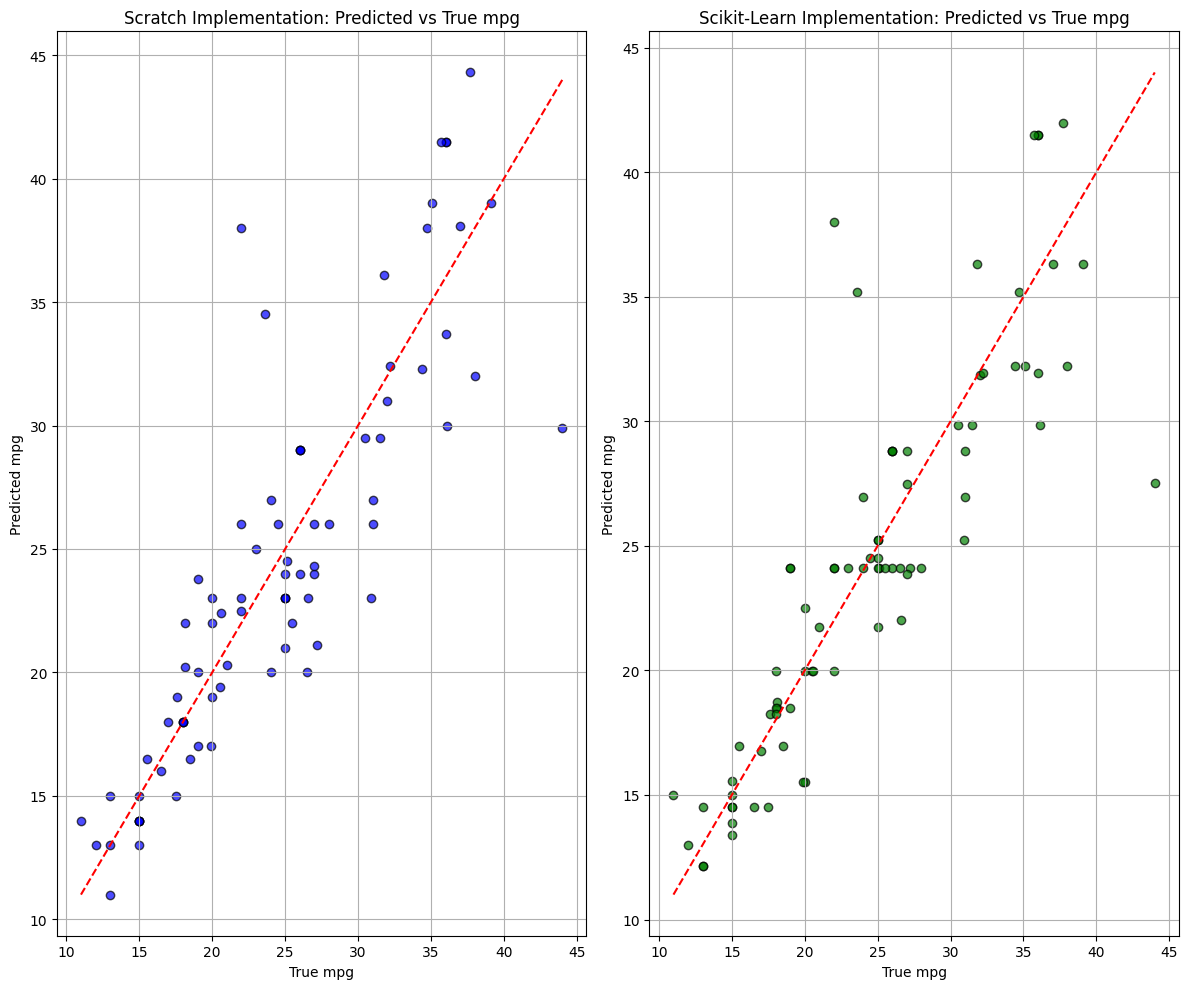

In [235]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Scatter plot for the from-scratch implementation
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_scrat, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True mpg')
plt.ylabel('Predicted mpg')
plt.title('Scratch Implementation: Predicted vs True mpg')
plt.grid(True)

# Scatter plot for scikit-learn's implementation
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sklearn, color='green', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True mpg')
plt.ylabel('Predicted mpg')
plt.title('Scikit-Learn Implementation: Predicted vs True mpg')
plt.grid(True)

plt.tight_layout()
plt.show()


# Task 8: Plotting Decision Tree

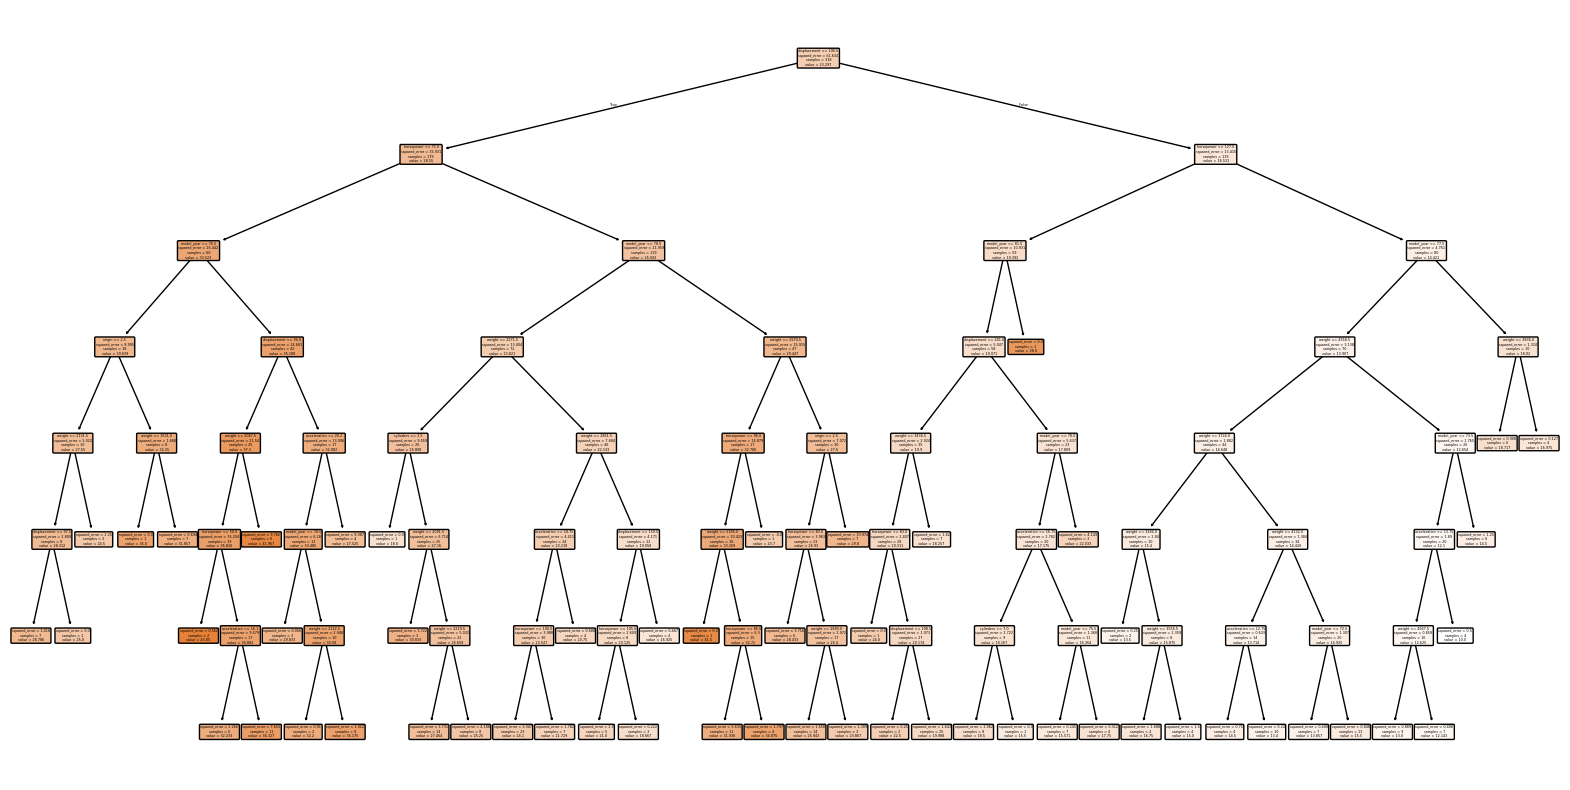

In [236]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
X = auto_mpg.data.features
plt.figure(figsize=(20, 10))  # Adjust the size of the figure to fit the tree
plot_tree(best_model, filled=True, feature_names=X.columns, rounded=True)
plt.show()